# PRACTICUM 3: LINEAR REGRESSION # 

### Abstract ###

The objective of the assignment is to implement Linear Regression from scratch, implement Gradient Descend algorithm to learn the parameters of linear regression function from the training set. To apply linear regression algorithm to predict the housing prices in Boston city. To get familiarized on tuning the performance of gradient descent algorithm on the Boston housing price dataset from UCI Machine Learning Repository.

In our results/findings, we have obtained an average of RMSE of 4.70 from the Cross-Validation method (CV-5, CV-10 and CV-15). We have also computed an optimal learning rate of 0.50 and the weights of the linear regression as [-9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306 19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721 -8.95582398   3.69282735 -19.01724361] and a biase (y-intercept) of 26.62026758. 

---
## PART 1 ##

In [2]:
# create a dataframe to have a preview of the data
name_cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_df = pd.read_csv("housing.data", names = name_cols, header=None, delim_whitespace = True)
raw_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
# check for null values. found none
row_num = raw_df.shape[0]
col_num = raw_df.shape[1]
print(f'{raw_df.isnull().sum()}, ROWS: {row_num}, COLS:{col_num}') # check for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64, ROWS: 506, COLS:14


Based on null value check above, we found no null values. The dataframe preview shows that the data are in order. The numerical values in each column is in a similar range, showing no sign of irregularities. Thus, we will leave out data preprocessing. 

---
## PART 2 ##

The objective of Linear regression is to model a linear relationship between explanatory variables/features (independant variables) and a target (dependant variable). 

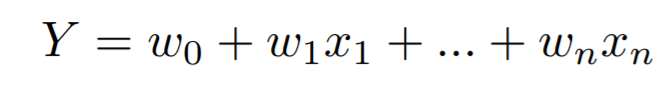

Y is the predicted variable or target <br>
w0 is the intercept or bias term <br>
w1, …, wn are our model parameters <br>
x1, …, xn are the features <br>

Based on the dataframe shown above, there are 13 features and 1 label. We would need to estimate 13 parameters (coefficients) and an additional column of ones to compute biased (y-intercept).

Or, in matrix form :

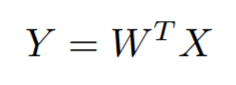

W : parameter vector with intercept <br>
X : feature vector

---
## PART 3 ##

To pick 5 relevant attributes, we would like to do plot a correlation matrix check the top 5 features that have the highest correlation with the output attribute MEDV. 

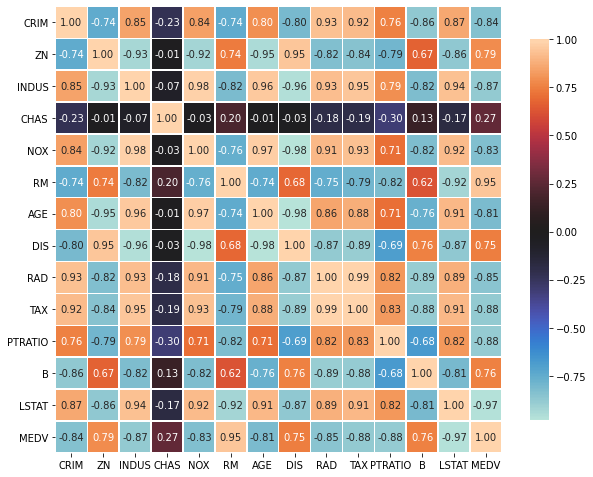

In [4]:
# Heatmap plot of the correlationship among the label and its features
correlation = raw_df.corr()
correlationship = correlation.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlationship, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

From the correlation matrix above, we picked LSTAT, PTRATIO, TAX, RM, and INDUS. All five attributes here have the highest correlation values relative to all.

In [5]:
five_features = raw_df[['LSTAT', 'PTRATIO', 'TAX', 'RM', 'INDUS', 'MEDV']]
five_features # selected attributes

,LSTAT,PTRATIO,TAX,RM,INDUS,MEDV
0,4.98,15.3,296.0,6.575,2.31,24.0
1,9.14,17.8,242.0,6.421,7.07,21.6
2,4.03,17.8,242.0,7.185,7.07,34.7
3,2.94,18.7,222.0,6.998,2.18,33.4
4,5.33,18.7,222.0,7.147,2.18,36.2
...,...,...,...,...,...,...
501,9.67,21.0,273.0,6.593,11.93,22.4
502,9.08,21.0,273.0,6.120,11.93,20.6
503,5.64,21.0,273.0,6.976,11.93,23.9
504,6.48,21.0,273.0,6.794,11.93,22.0


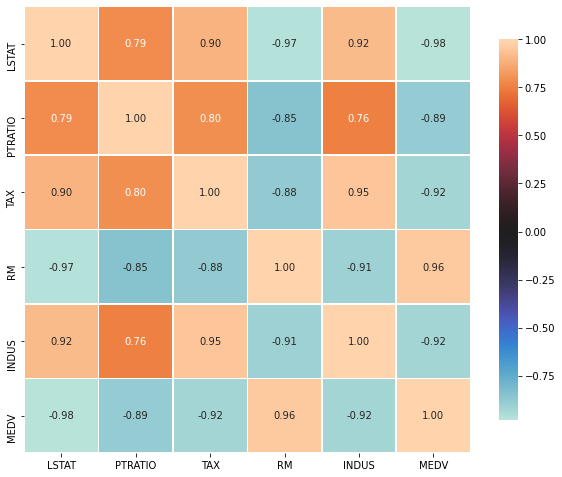

In [6]:
# Heatmap plot of the correlationship among the label and its features
correlation_five_features = five_features.corr()
correlationship_five = correlation_five_features.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlationship_five, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

The final correlation matrix plot above shows that among the 5 selected attributes, all have a correlation factor of about 0.90 and above with the output attribute MEDV

---
## PART 4 ##

Error function

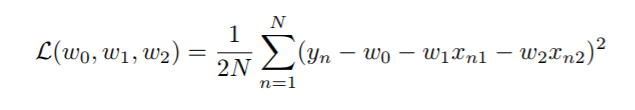

We will use a root mean-square-error (RMSE) loss function, defined above, as measure of goodness/fit for our model. It tells us how well our model is at making predictions given a set of parameters/coefficients. We aim at minimizing this cost by finding the optimal W*.

Note that though the equation shown above is a MSE loss function, we simply take the square root of MSE to compute the RMSE function.

---
## PART 5 ##

In order to find the optimal set of parameters, we will use gradient descent (GD), an optimization algorithm used to minimize some function by iteratively moving in the negative direction of the gradient.
At each step, we compute the gradient of the cost function with the current weights/coefficients and take a step in the opposite direction specified.
We repeat this process until convergence.

The Gradient Descent Update Rule is shown below.

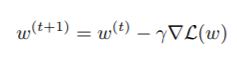

γ is the learning rate. It specifies the size of the step taken in the direction of the negative gradient. <br>
The higher the step, the faster our algorithm converges, however, we face the risk of missing the minimum by going “too far”. <br>
Lower step-sizes are more confident but are more time-consuming. <br>
The learning rate is called an hyperparameter and can be tuned. <br>

Graph of Cost against Weight (w)

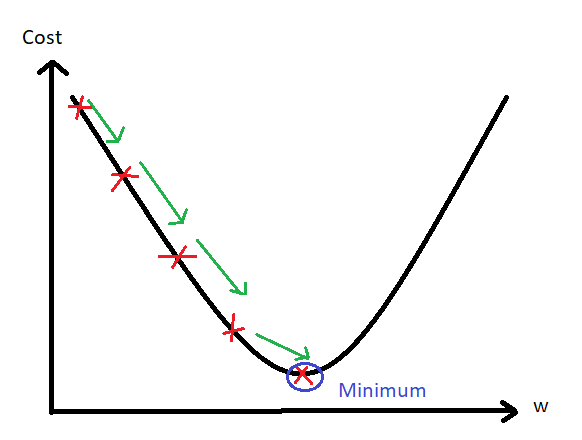

The steep curve at the early part of the iteration process points out that the gradient descent (GD) algorithm undergoes a bigger change of gradient (a negative gradient directly correlates with the decrement of the cost) until the gradient change is approaching a negligible decremental change to zero in an iterative process. When the cost function ceases to improve further, we can take it as the convergence criterion has reached too. The computed weights (w) at the convex minimum point will be the optimal theta values.

Graph of Loss/Cost against number of iteraction per run (epoch)

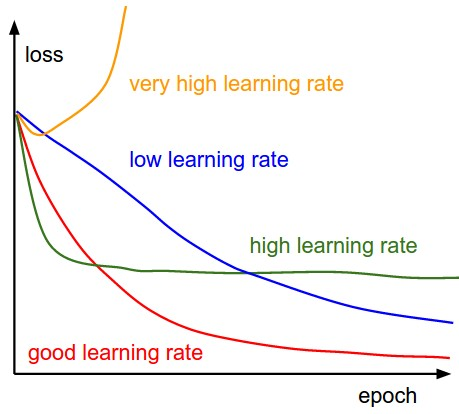

The graph above aptly describes the different outcomes of the learning rate. The lower the learning rate, the more iteration is needed to achieve a convergence criterion. On the other hand, the higher the learning rate, it takes less iteration to reach the convergence criterion. However, it doesn't mean that the higher the learning rate, the better it is overall. A higher learning rate will lead to a more haphazard descent path due to the bigger step-size. A high learning rate can overshoot the minimum point and fails to work properly for SGD. The best approach is to determine an optimal learning rate that will optimize the SGD algorithm.

To achieve an optimal learning rate, we set a low arbitrary cut-off loss value of 0.05 and set the max number of iteration at 50,000.  

Given the features matrix, X and label y, we can compute the optimal learning rate using our optimal_learn_rate function:

optimal_learn_rate(X, y_target, alpha, print_every=1000, niter=50000)

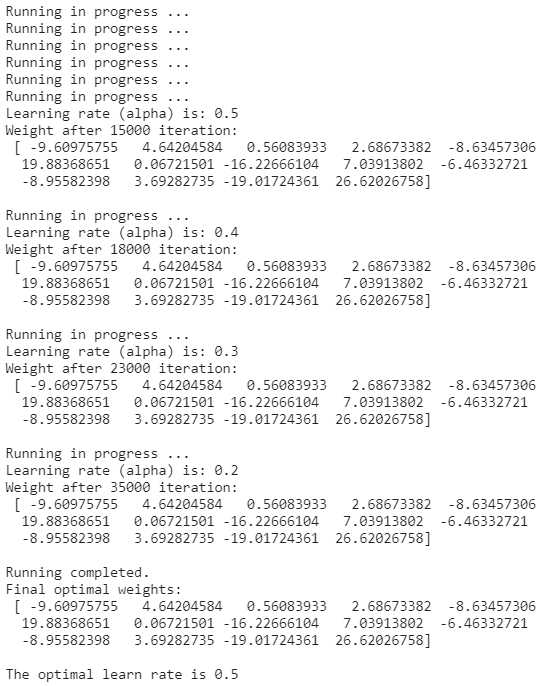

As shown above (actual computation), the first learning rate (0.50) that appears is the optimal learning rate because from there onwards, there is no more improvement in the theta (weights). There's when we know the convergence criterion has reached.

---
## PART 6 ##

k-fold cross_validation method is implemented in the py file. The code base can be reviewed in the appendix at the end of this report.

---
## PART 7 ##

### Plots of y_predicted values and y_actual values for CV-5 below ###

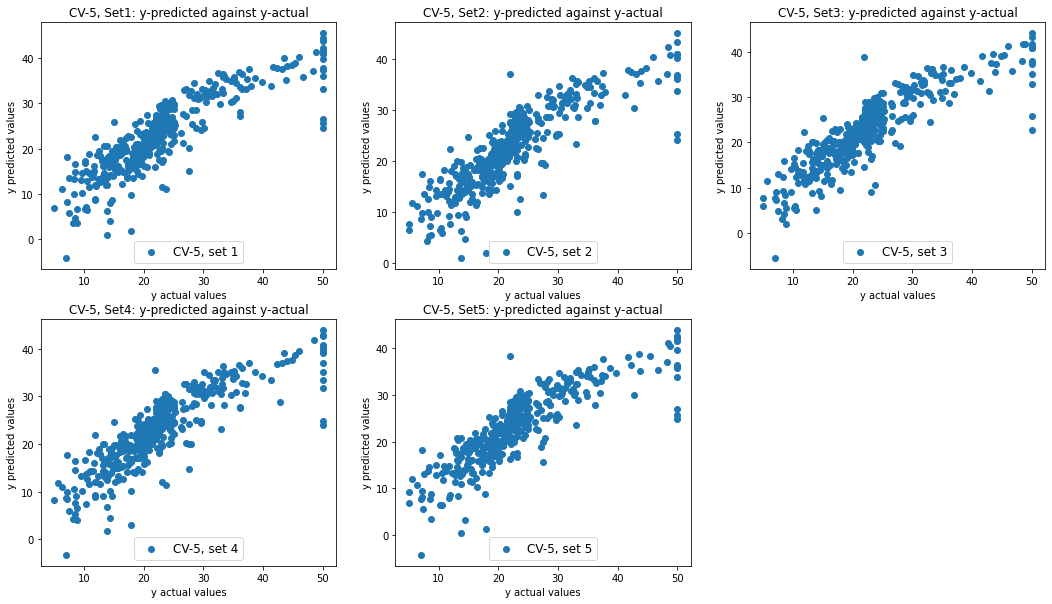

In [49]:
#  CV-5 Plots of y-predicted against y-actual
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(18,10))

for i in range(5):
    plt.subplot(a, b, c)
    plt.title(f'CV-5, Set{i+1}: y-predicted against y-actual')
    plt.xlabel('number of counts')
    plt.ylabel('y predicted values')
#     m, b = np.polyfit(cv5_yactual[i], cv5_ypred[i], 1)
#     plt.plot(cv5_yactual[i], cv5_ypred[i], '.')
#     plt.plot(cv5_yactual[i], m*cv5_ypred[i]+b)
    plt.scatter(cv5_yactual[i], cv5_ypred[i], label = f'CV-5, set {i+1}')
    plt.xlabel(f'y actual values')
    plt.ylabel(f'y predicted values')
    plt.legend(loc='lower center', fontsize = 'large') 
    c = c + 1

### Plots of y_predicted values and y_actual values for CV-10 below ###

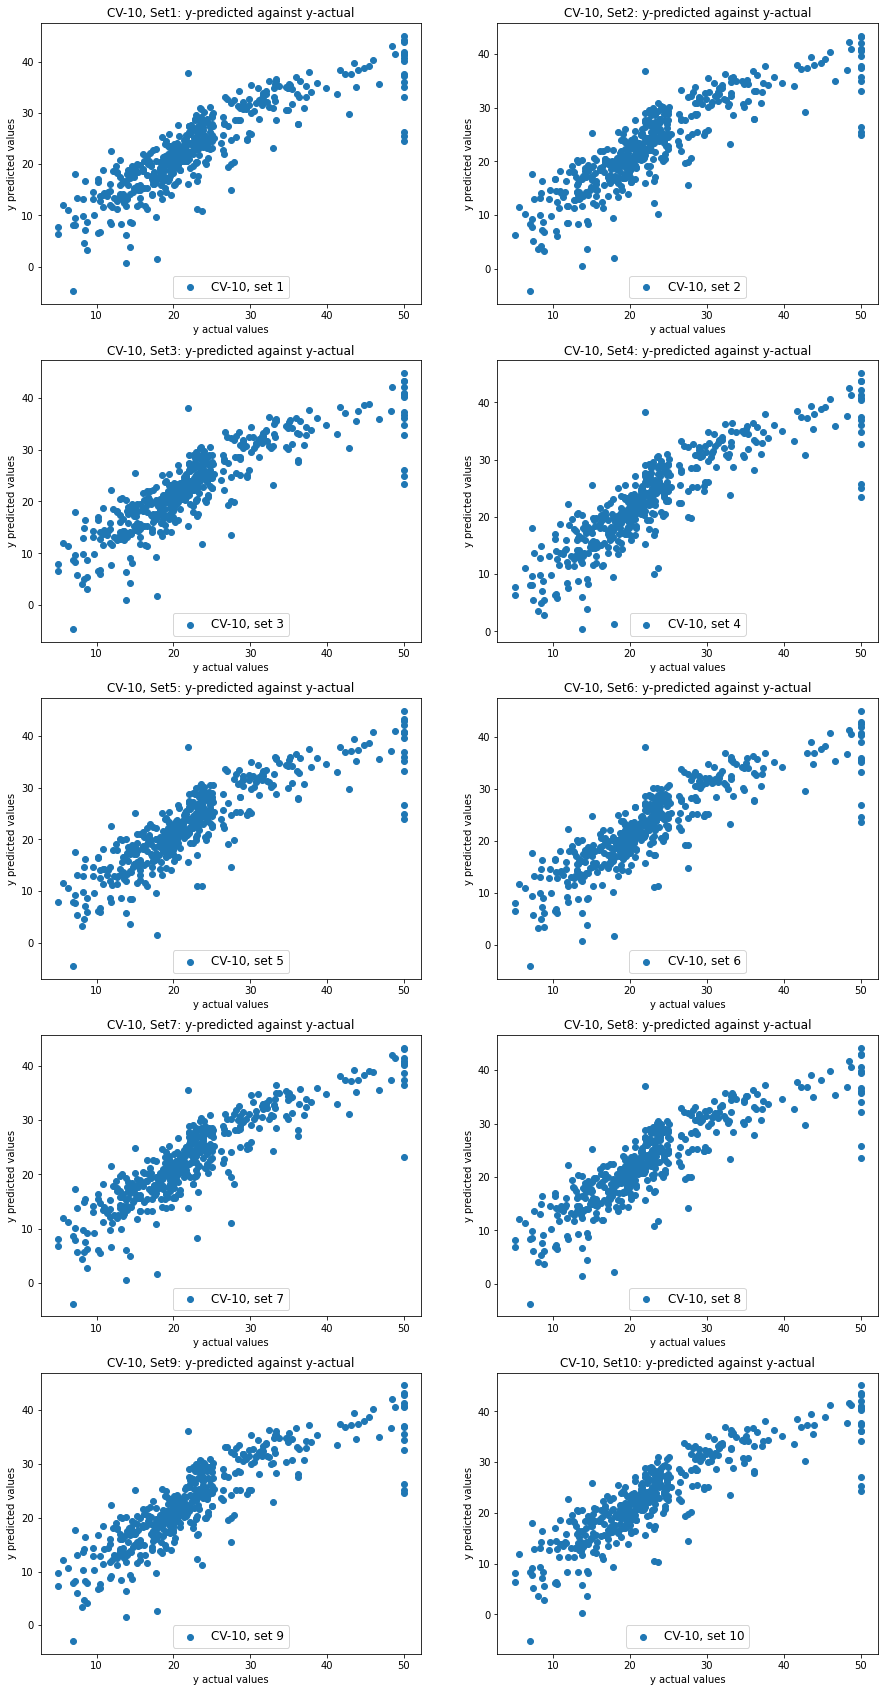

In [53]:
#  CV-10 Plots of y-predicted against y-actual
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,30))
for i in range(10):
    plt.subplot(a, b, c)
    plt.title(f'CV-10, Set{i+1}: y-predicted against y-actual')
    plt.xlabel('number of counts')
    plt.ylabel('y predicted values')
#     m, b = np.polyfit(cv5_yactual[i], cv5_ypred[i], 1)
#     plt.plot(cv5_yactual[i], cv5_ypred[i], '.')
#     plt.plot(cv5_yactual[i], m*cv5_ypred[i]+b)
    plt.scatter(cv10_yactual[i], cv10_ypred[i], label = f'CV-10, set {i+1}')
    plt.xlabel(f'y actual values')
    plt.ylabel(f'y predicted values')
    plt.legend(loc='lower center', fontsize = 'large') 
    c = c + 1

### Plots of y_predicted values and y_actual values for CV-15 below ###

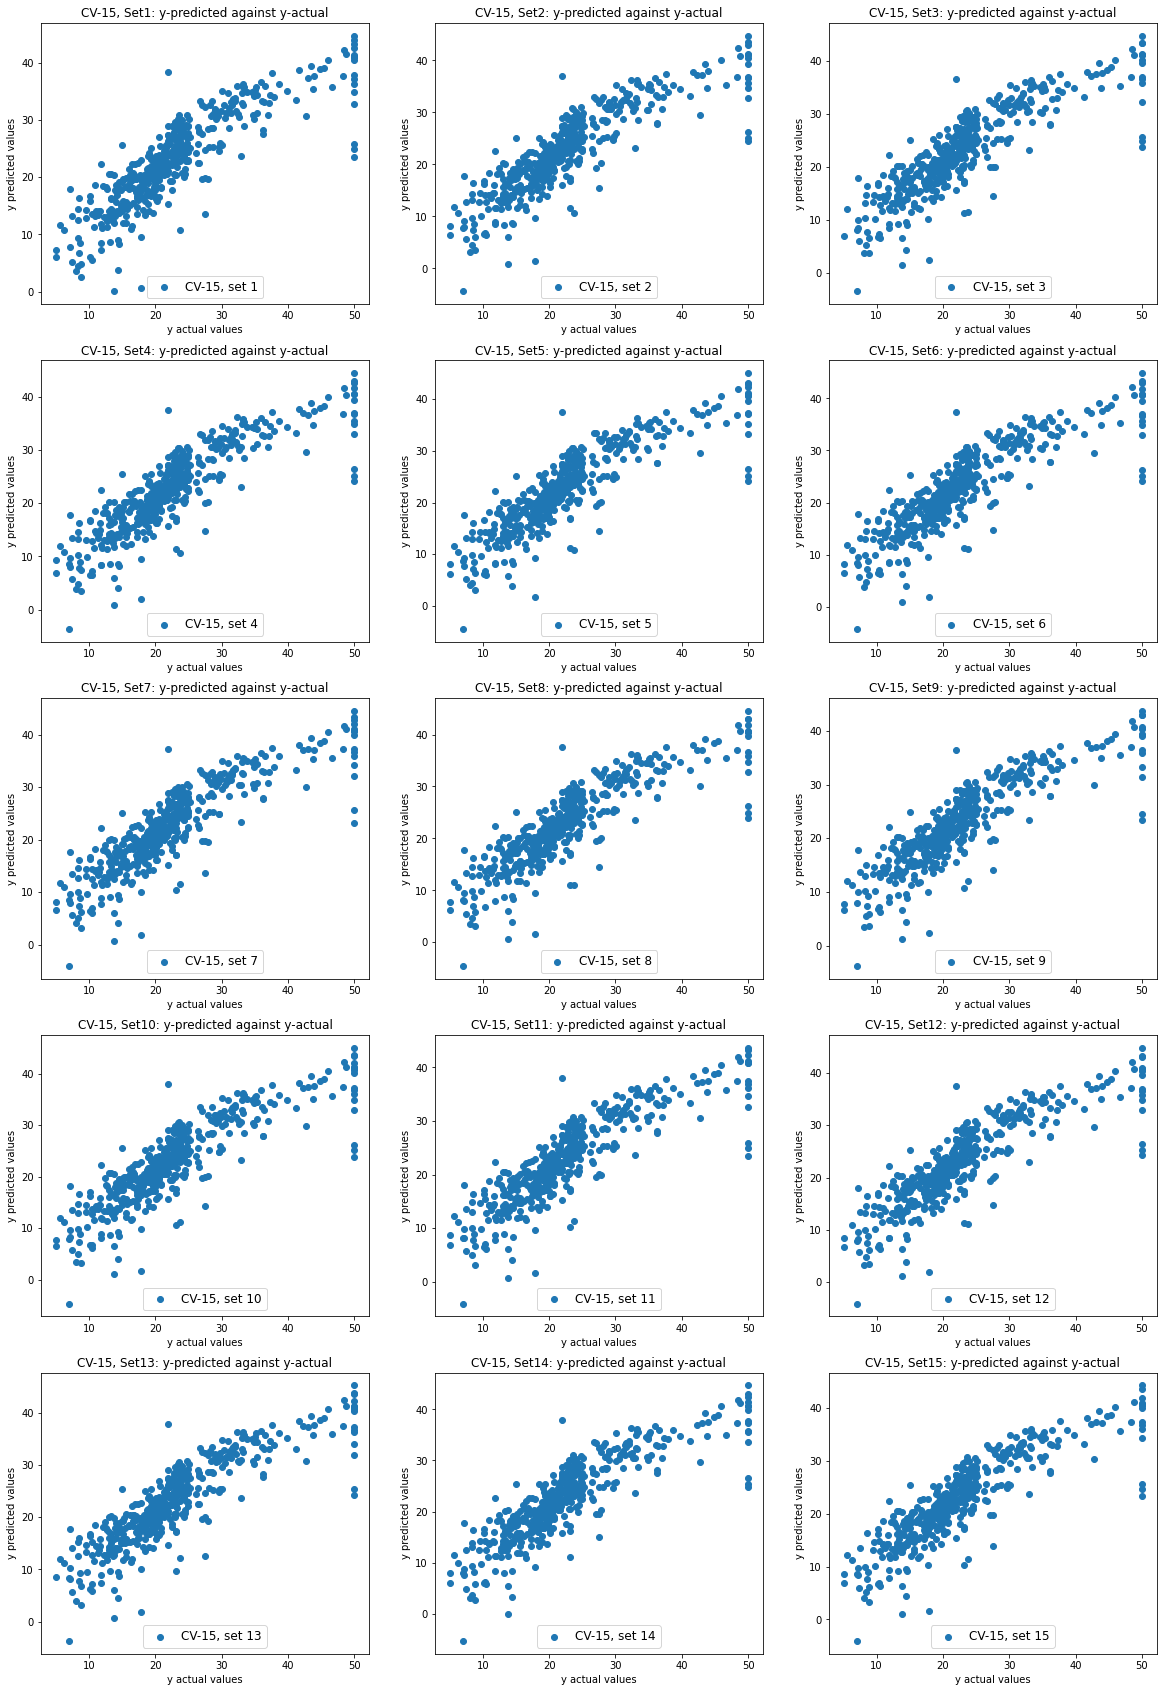

In [55]:
#  CV-15 Plots of y-predicted against y-actual
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,30))

for i in range(15):
    plt.subplot(a, b, c)
    plt.title(f'CV-15, Set{i+1}: y-predicted against y-actual')
    plt.xlabel('number of counts')
    plt.ylabel('y predicted values')
#     m, b = np.polyfit(cv5_yactual[i], cv5_ypred[i], 1)
#     plt.plot(cv5_yactual[i], cv5_ypred[i], '.')
#     plt.plot(cv5_yactual[i], m*cv5_ypred[i]+b)
    plt.scatter(cv15_yactual[i], cv15_ypred[i], label = f'CV-15, set {i+1}')
    plt.xlabel(f'y actual values')
    plt.ylabel(f'y predicted values')
    plt.legend(loc='lower center', fontsize = 'large') 
    c = c + 1

---
In order to evaluate on how accurate our linear regression model can predict the output, we use root-mean-square error (RMSE) as a measurement metric in our analysis. 

The RMSE represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors). RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.

As shown below, we have actually computed the RMSE values for CV-5, CV-10 and CV-15 (computation results can be found in the appendix of this report)

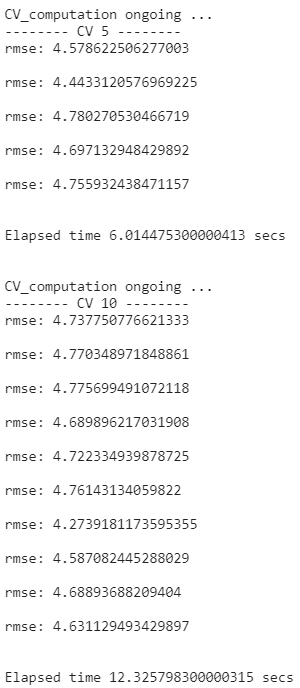

---
## PART 8 ##

There are 2 other main metrics for model evaluation in regression besides RMSE:

1. R-Square

2. Mean-Absolute Error (MAE)

### R Square/Adjusted R Square ###

R Square measures how much of variability in dependent variable can be explained by the model. It is square of Correlation Coefficient(R) and that is why it is called R Square.

R Square is calculated by the sum of squared of prediction error divided by the total sum of square which replace the calculated prediction with mean. R Square value is between 0 to 1 and bigger value indicates a better fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If our regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalise additional independent variables added to the model and adjust the metric to prevent overfitting issue.

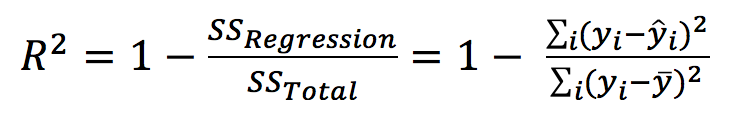

### Mean Square Error(MSE)/Root Mean Square Error(RMSE) ###

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.

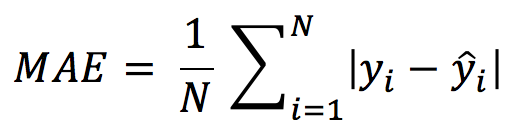

MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives us an absolute number on how much our predicted results deviate from the actual number. We cannot interpret much insights from one single result but it gives us a real number to compare against other model results and help us to select the best regression model.

---
## PART 9 ##

### Pros of the Linear Regression Algorithm ###

Simple model : The Linear regression model is the simplest equation using which the relationship between the multiple predictor variables and predicted variable can be expressed.

Computationally efficient : The modeling speed of Linear regression is fast as it does not require complicated calculations and runs predictions fast when the amount of data is large.

Interpretability of the Output: The ability of Linear regression to determine the relative influence of one or more predictor variables to the predicted value when the predictors are independent of each other is one of the key reasons of the popularity of Linear regression. The model derived using this method can express the what change in the predictor variable causes what change in the predicted or target variable.

### Cons of the Linear Regression Algorithm ###

Overly-Simplistic: The Linear regression model is too simplistic to capture real world complexity

Linearity Assumption: Linear regression makes strong assumptions that there is Predictor (independent) and Predicted (dependent) variables are linearly related which may not be the case.

Severely affected by Outliers: Outliers can have a large effect on the output, as the Best Fit Line tries to minimize the MSE for the outlier points as well, resulting in a model that is not able to capture the information in the data.

Independence of variables : Assumes that the predictor variables are not correlated which is rarely true. It is important to, therefore, remove multicollinearity (using dimensionality reduction techniques) because the technique assumes that there is no relationship among independent variables. In cases of high multicollinearity, two features that have high correlation will influence each other’s weight and result in an unreliable model.

Assumes Homoskedacity : Linear regression looks at a relationship between the mean of the predictor/dependent variable and the predicted/independent variables and assumes constant variance around the mean which is unrealistic in most cases.

Inability to determine Feature importance : In cases of high multicollinearity, 2 features that have high correlation will affect each other’s weight. If we run stochastic linear regression multiple times, the result may be different weights each time for these 2 features. So, it’s we cannot really interpret the importance of these features.

---
## PART 10 ##

Despite all its shortcomings mentioned above, linear regression still plays a very useful algorithm in solving many real life problems in an analytical approach. We can still improve linear regression algorithm to improve it's performance. 

Regularization (lasso(L1) and Ridge(L2)) is one of the way we can use. Regularization is the process of regularizing the parameters that constrain, regularizes, or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, avoiding the risk of overfitting. 

Data preprocessing is equally important to improve the algorithm. If we feed 'garbage' data into the model, we will churn out 'garbage' learned rate, theta and accuracy. It's important to do the data cleaning well to feed clean data into the model to get the actual results. 

Dimensionality Reduction. Not forgetting that there the dataset could have collected many features but not all the features are important to predict the y outcome. Some of the features could be correlated to one another, from little to much (multi-collinearity). Multi-collinearity adds to the complexity of the model without improveing the model performance.  Some features that are highly influential to predict the outcome should be retained to train the model while those that are not, can be removed in the feature selection process. 

---
## APPENDIX of the Program Code Base ##

In [34]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt 
import csv
import pprint as pp
import seaborn as sns
from time import perf_counter 

In [44]:
# data preparation for latter use 
df = pd.DataFrame(raw_df).to_numpy() # convert from dataframe format to numpy format
# print(f'last row last column: {df[505][-1]}, type: {type(df[1][-1])}')
print(df.shape)
x_features_only = df[:, :-1]  # all features
y_target = df[:, -1]  # only y label

y_response = y_target.reshape((506,1)) # gotta reshape for concatenate purpose
print('y_response shape:', y_response.shape)

x_features_ones_ylabel = np.concatenate([x_features_only, np.ones([np.shape(x_features_only)[0], 1]), y_response], axis=1)
# pp.pprint(x_features_ones_ylabel)  # x_features are NOT normalised yet.
print('df_shape of features + ones + label:', x_features_ones_ylabel.shape)

(506, 14)
y_response shape: (506, 1)
df_shape of features + ones + label: (506, 15)


In [8]:
# data preparation for latter use 
def dataNorm(X):
    '''
    input: X is a matrix of x-features and y-label
    output: x-features only all in proper columns
    '''
    xMerged = np.ones([np.shape(X)[0]])  # create a temp row of all zeros for vstack purpose only
    f_transpose = X.T #feature cols. switch the columns to rows for iteration later
    for i in f_transpose:  
        arr_transpose = (i - np.min(i)) / np.ptp(i)
        xMerged = np.vstack((xMerged, arr_transpose)) # merging output and features row-wise

    final_merged = xMerged[1:] # remove temp row of all zeros
    return final_merged.T # transpose to make features col-wise again

In [9]:
# Part 5
def gradient_func(weights, X, y_target):  # Vectorized gradient function
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,D) of input features
          `y_target` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    N, D = np.shape(X)
    y_pred = np.dot(X, weights)  # alternative, use np.matmul()
    error = np.subtract(y_pred, y_target)
    return y_pred, error  # return the gradient of the cost function

In [10]:
def predict(x_test, y_test, w):
    '''
    Compute y prediction, error and rmse 
    Given `X` - matrix of shape (N,D) of input features
          `y_target` - target y values
    Solves for rmse  y prediction and y_test.
    Return y prediction, y_test and rmse
    '''
    y_pred, error = gradient_func(w, x_test, y_test)   # call the gradient function. get y_pred, error output
#     print('y_pred shape:', y_pred.shape)   
    rmse = np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()) 
    print('rmse:', rmse)
    
    return y_pred, y_test, rmse  # return the gradient of the cost function

In [11]:
# function to find the optimal learn rate
def optimal_learn_rate(X, y_target, alpha, print_every=1000, niter=50000):  # gotta varies the alpha to get the most accurate w
    '''
    Given `X` - matrix of shape (N,D) of input features
          `y_target` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)                                  # feature matrix has N rows and D cols
    w = np.zeros([D]) 

    # initialize all the weights to zeros based on N cols of feature matrix
    for k in range(niter):   # loop over niter counts
       
        y_pred, error = gradient_func(w, X, y_target)        # call the gradient function. get y_pred, error output
        dw = np.dot(np.transpose(X), error) / float(N)
        # -------------------------------------------------------------------------------
        prev = w                           # assign the previous weight to prev variable
        w = w - alpha * dw                 # update the weight with the learning rate and gradient change 
        new = w                            # update the new weight to new variable
        # ------------------------------------------------------------------------------   
        # when there is no improvement over the previous w, then get the latest optimal value
        if k % print_every == 0 and np.all(new-prev) == False:           # for every 5000 count
            print(f"Learning rate (alpha) is: {str(alpha)}")
            print(f'Weight after {k} iteration:\n {str(w)}')
            print()
            break                 

    return w
### ------ calling main to determine optimal learn rate -------
x_features = x_features_ones_ylabel[:,:-2]
x_features_normalized = dataNorm(x_features)
x_features_normalized_ones = np.concatenate([x_features_normalized, np.ones([np.shape(x_features_normalized)[0], 1])], axis=1)
y_entire = x_features_ones_ylabel[:,-1]

for i in np.arange(1.0, 0.1, -0.1):  # Part 5 main calling block
    print('Running in progress ...')
    weight = optimal_learn_rate(X = x_features_normalized_ones, y_target = y_entire, alpha = round(i,3))

print('Running completed.')
# print('The first learning rate that shows up is the optimal learning rate.\n')
print('Final optimal weights:\n', weight)
print('\nThe optimal learn rate is 0.5')
np.savetxt("optimal_weights.csv", weight, fmt="%10.8f", delimiter=",")

Running in progress ...
Running in progress ...
Running in progress ...
Running in progress ...
Running in progress ...
Running in progress ...
Learning rate (alpha) is: 0.5
Weight after 15000 iteration:
 [ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361  26.62026758]

Running in progress ...
Learning rate (alpha) is: 0.4
Weight after 18000 iteration:
 [ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361  26.62026758]

Running in progress ...
Learning rate (alpha) is: 0.3
Weight after 23000 iteration:
 [ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361  26.62026758]

Running in progress ...
Learning rate (alpha) is: 0.2
Weight aft

In [12]:
# Check confirm our weights telly with the np.linalg.lstsq weights 
np.linalg.lstsq(x_features_normalized_ones, y_entire, rcond=None)[0] # the last in the output is the y-intercept

array([ -9.60975755,   4.64204584,   0.56083933,   2.68673382,
        -8.63457306,  19.88368651,   0.06721501, -16.22666104,
         7.03913802,  -6.46332721,  -8.95582398,   3.69282735,
       -19.01724361,  26.62026758])

In [13]:
# Part 5
def gradient_descent(X, y_target, alpha, print_every=5000, niter=100000):  # gotta varies the alpha to get the most accurate w
    '''
    Given `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)                                  # feature matrix has N rows and D cols
    w = np.zeros([D])                                   # initialize all the weights to zeros based on N cols of feature matrix
    for k in range(niter):   # loop over niter counts
       
        y_pred, error = gradient_func(w, X, y_target)        # call the gradient function. get y_pred, error output
        dw = np.dot(np.transpose(X), error) / float(N)
        # -------------------------------------------------------------------------------
        prev = w                           # assign the previous weight to prev variable
        w = w - alpha * dw                 # update the weight with the learning rate and gradient change 
        new = w                            # update the new weight to new variable
        # ------------------------------------------------------------------------------        
    return w

In [14]:
# Part 6
def splitCV(X_norm, K): # Split a dataset into k folds
    dataset_split = []
    np.random.shuffle(X_norm) # shuffles the rows in the X_norm matrix
    fold_size = int(len(X_norm) / K) # compute the num of rows per fold
    row_num = X_norm.shape[0]

    for i in range(K):
        if i == K-1:
            fold = np.array(X_norm)
            dataset_split.append(X_norm)
        else:
            dataset_split.append(X_norm[:fold_size])
            X_norm = X_norm[fold_size:]       
    return dataset_split

In [15]:
#Part 6
def CV_Main(x_features_ones_ylabel, cv_num): # k = number of neighbors
    cv_list = []
    X_cv = splitCV(x_features_ones_ylabel, cv_num) # split the data set into K folds = number of parts. X_cv is a list of folds
    print('\nCV_computation ongoing ... ')
    for idx, list_array in enumerate(X_cv): # looping the dataset for cross validation 
        duplicate = X_cv.copy()
        test = list_array
        del duplicate[idx]  # delete the test element from duplicate set, remaining become train elements
        train = duplicate   # remaining elements in duplicate become train set
        train = np.vstack((train)) # convert train stack up vertically
        cv_list.append(np.array([test, train])) #append test and train into a list before return
    return cv_list  # cv_list is a list type containing 2 elements - test and train

In [52]:
## PART 6 and 7    
# MAIN CALL BLOCK for CROSS VALIDATION over 5, 10, 15
cv5_ypred = []   # stores 5 elements of y_pred.
cv10_ypred = []  # stores 10 elements of y_pred.
cv15_ypred = []  # stores 15 elements of y_pred.
cv5_yactual = []   # stores 5 elements of y_actual.
cv10_yactual = []  # stores 10 elements of y_actual.
cv15_yactual = []  # stores 15 elements of y_actual.
cv5_rmse = []    # stores 5 rmse values
cv10_rmse = []   # stores 10 rmse values
cv15_rmse = []   # stores 15 rmse values

for cv in [5, 10, 15]:  # Looping over the cv numbers

    t1_start = perf_counter() # Start the stopwatch / counter 
    cv_list = CV_Main(x_features_ones_ylabel, cv)    
    print(f"-------- CV {cv} --------")
    
    for num in cv_list:  # for each fold in a list of k folds

        test = num[0]            # grab the test set from the fold
        x_test_features = test[:, :-2]    # grab the features from the test set
        test_ones = test[:, -2]
        x_test_ones = test_ones.reshape((test_ones.shape[0], 1))
        x_test_features_norm = dataNorm(x_test_features)     
        y_test = test[:, -1]     # grab the label from the test set
        # after test features are normalized, add the col of ones to become x_test
        x_test = np.concatenate((x_test_features_norm, x_test_ones), axis=1)

        train = num[1]           # grab the train set from the fold
        x_train_features = train[:, :-2]    # grab the features from the test set
        train_ones = train[:, -2]
        x_train_ones = train_ones.reshape((train_ones.shape[0], 1))
        x_train_features_norm = dataNorm(x_train_features)       
        y_train = train[:, -1]   # grab the label from the train set
        # after train features are normalized, add the col of ones to become x_train
        x_train = np.concatenate((x_train_features_norm, x_train_ones), axis=1)        

        w = gradient_descent(x_train, y_train, alpha=0.5)  # get the fitted weights from x, y train sets 
        y_pred, y_actual, rmse = predict(x_train, y_train, w)  # apply the w onto the x, y test sets to yield y_pred 
        print()
        if cv == 5:
            cv5_ypred.append(y_pred)
            cv5_yactual.append(y_actual)
            cv5_rmse.append(rmse)
            cv5_train = train
            cv5_test = test
            
        elif cv == 10:
            cv10_ypred.append(y_pred)
            cv10_yactual.append(y_actual)
            cv10_rmse.append(rmse)
            cv10_train = train
            cv10_test = test

        elif cv == 15:
            cv15_ypred.append(y_pred)
            cv15_yactual.append(y_actual)
            cv15_rmse.append(rmse)
            cv15_train = train
            cv15_test = test

    t1_stop = perf_counter() # Stop the stopwatch / counter 
    print(f'\nElapsed time {t1_stop-t1_start} secs\n') 
print()
print('---- Run completed ----')    
# -------------------------------------------------
with open('cv5_ypred.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in cv5_ypred) 
    
with open('cv5_yactual.csv', 'w') as f: 
    write = csv.writer(f)       
    write.writerows(val for val in cv5_yactual) 
    
with open('cv5_rmse.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerow(val for val in cv5_rmse)
    
with open('cv5_train.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(list(val) for val in cv5_train)
    
with open('cv5_test.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(list(val) for val in cv5_test) 
#------------------------------------------------    
with open('cv10_ypred.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in cv10_ypred) 
    
with open('cv10_yactual.csv', 'w') as f: 
    write = csv.writer(f)       
    write.writerows(val for val in cv10_yactual) 
    
with open('cv10_rmse.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerow(val for val in cv10_rmse)
    
with open('cv10_train.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(list(val) for val in cv10_train)
    
with open('cv10_test.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(list(val) for val in cv10_test)
#------------------------------------------------
with open('cv15_ypred.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in cv15_ypred) 
    
with open('cv15_yactual.csv', 'w') as f: 
    write = csv.writer(f)       
    write.writerows(val for val in cv15_yactual) 
    
with open('cv15_rmse.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerow(val for val in cv15_rmse)
    
with open('cv15_train.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(list(val) for val in cv15_train)
    
with open('cv15_test.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(list(val) for val in cv15_test) 


CV_computation ongoing ... 
-------- CV 5 --------
rmse: 4.578622506277003

rmse: 4.4433120576969225

rmse: 4.780270530466719

rmse: 4.697132948429892

rmse: 4.755932438471157


Elapsed time 6.014475300000413 secs


CV_computation ongoing ... 
-------- CV 10 --------
rmse: 4.737750776621333

rmse: 4.770348971848861

rmse: 4.775699491072118

rmse: 4.689896217031908

rmse: 4.722334939878725

rmse: 4.76143134059822

rmse: 4.2739181173595355

rmse: 4.587082445288029

rmse: 4.68893688209404

rmse: 4.631129493429897


Elapsed time 12.325798300000315 secs


CV_computation ongoing ... 
-------- CV 15 --------


<ipython-input-8-a898166ef641>:9: RuntimeWarning: invalid value encountered in true_divide
  arr_transpose = (i - np.min(i)) / np.ptp(i)


rmse: 4.6795262330364125

rmse: 4.696537244565252

rmse: 4.671980368866542

rmse: 4.697587162773623

rmse: 4.6457815409312335

rmse: 4.7431216000188385

rmse: 4.630852833487026

rmse: 4.716213731384314

rmse: 4.568497687796849

rmse: 4.764551486251488

rmse: 4.690253415665588

rmse: 4.737423728746791

rmse: 4.59603124253122

rmse: 4.663924199440147

rmse: 4.604734979132696


Elapsed time 18.490785299999516 secs


---- Run completed ----


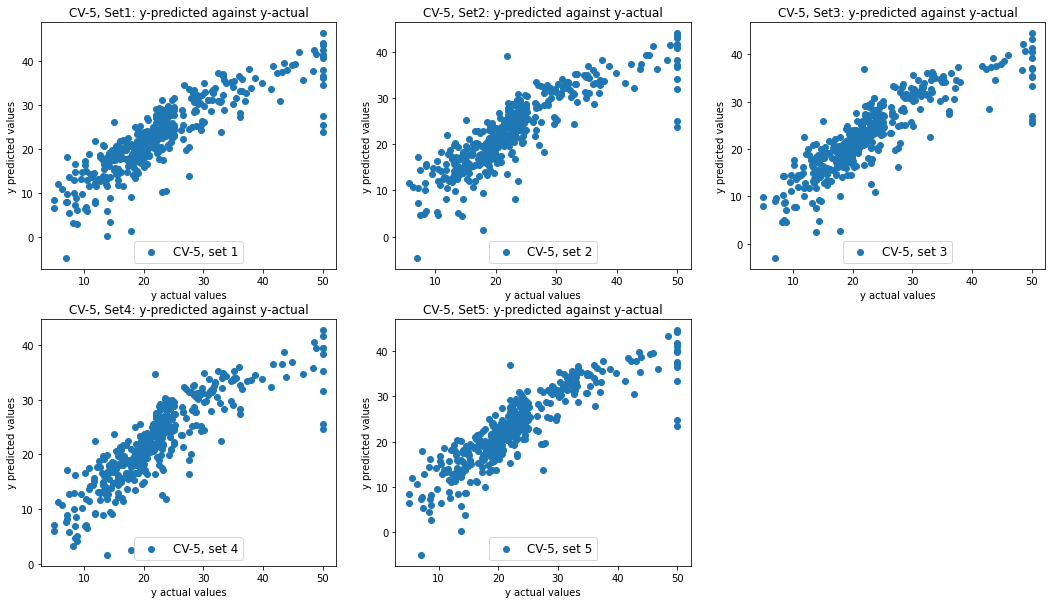

In [51]:
#  CV-5 Plots of y-predicted against y-actual
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(18,10))

for i in range(5):
    plt.subplot(a, b, c)
    plt.title(f'CV-5, Set{i+1}: y-predicted against y-actual')
    plt.xlabel('number of counts')
    plt.ylabel('y predicted values')
#     m, b = np.polyfit(cv5_yactual[i], cv5_ypred[i], 1)
#     plt.plot(cv5_yactual[i], cv5_ypred[i], '.')
#     plt.plot(cv5_yactual[i], m*cv5_ypred[i]+b)
    plt.scatter(cv5_yactual[i], cv5_ypred[i], label = f'CV-5, set {i+1}')
    plt.xlabel(f'y actual values')
    plt.ylabel(f'y predicted values')
    plt.legend(loc='lower center', fontsize = 'large') 
    c = c + 1

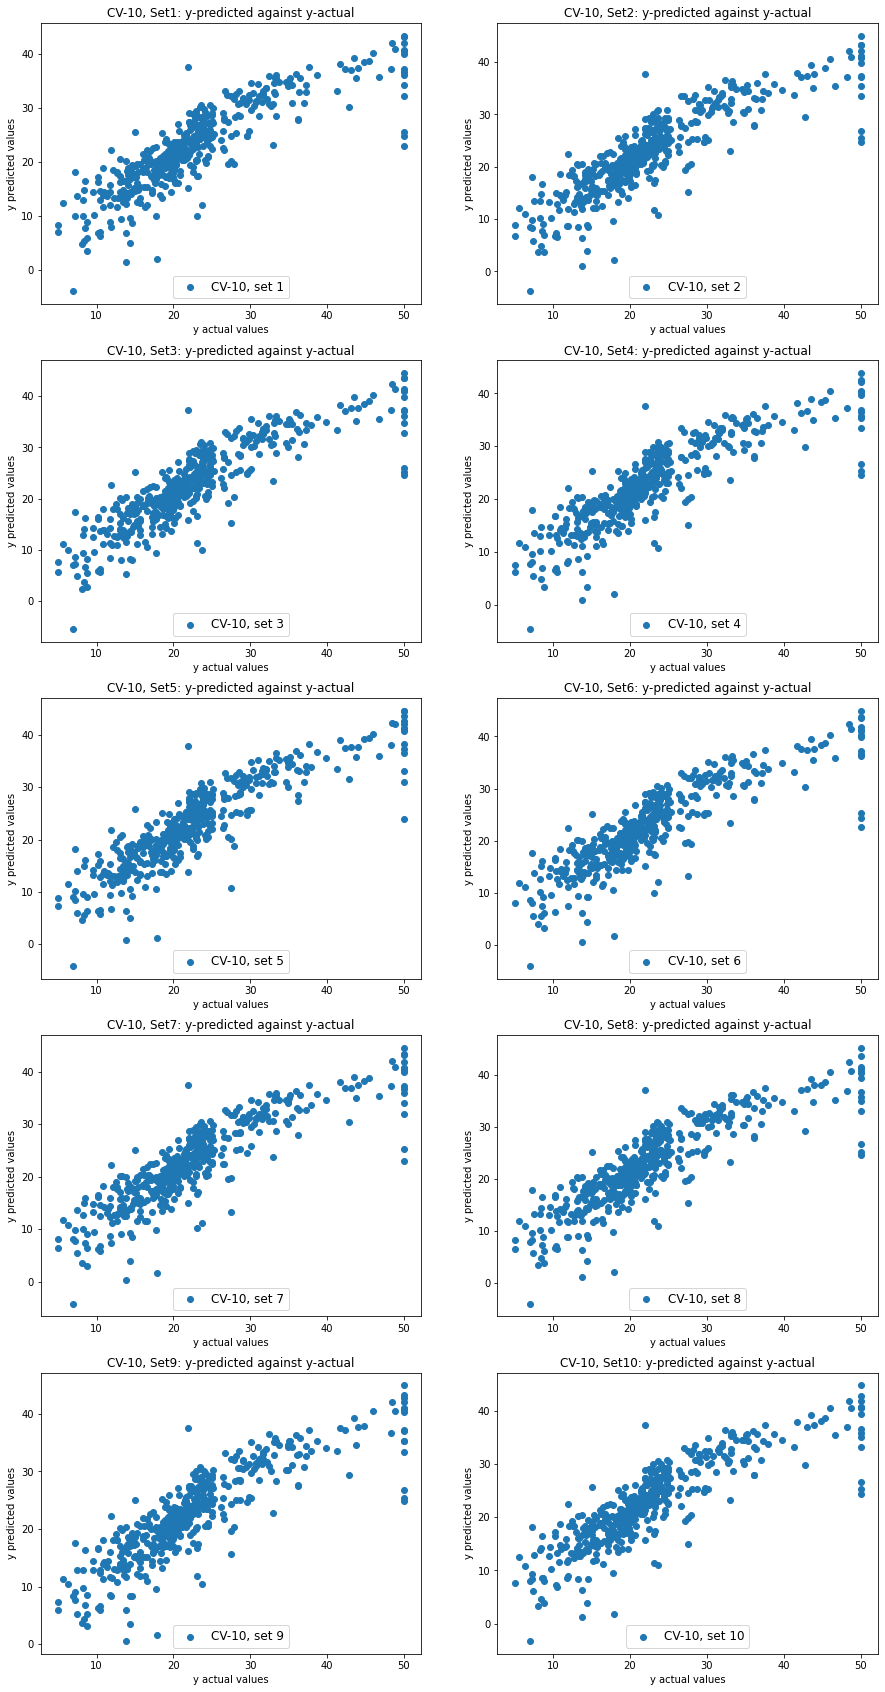

In [19]:
#  CV-10 Plots of y-predicted against y-actual
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,30))
for i in range(10):
    plt.subplot(a, b, c)
    plt.title(f'CV-10, Set{i+1}: y-predicted against y-actual')
    plt.xlabel('number of counts')
    plt.ylabel('y predicted values')
#     m, b = np.polyfit(cv5_yactual[i], cv5_ypred[i], 1)
#     plt.plot(cv5_yactual[i], cv5_ypred[i], '.')
#     plt.plot(cv5_yactual[i], m*cv5_ypred[i]+b)
    plt.scatter(cv10_yactual[i], cv10_ypred[i], label = f'CV-10, set {i+1}')
    plt.xlabel(f'y actual values')
    plt.ylabel(f'y predicted values')
    plt.legend(loc='lower center', fontsize = 'large') 
    c = c + 1

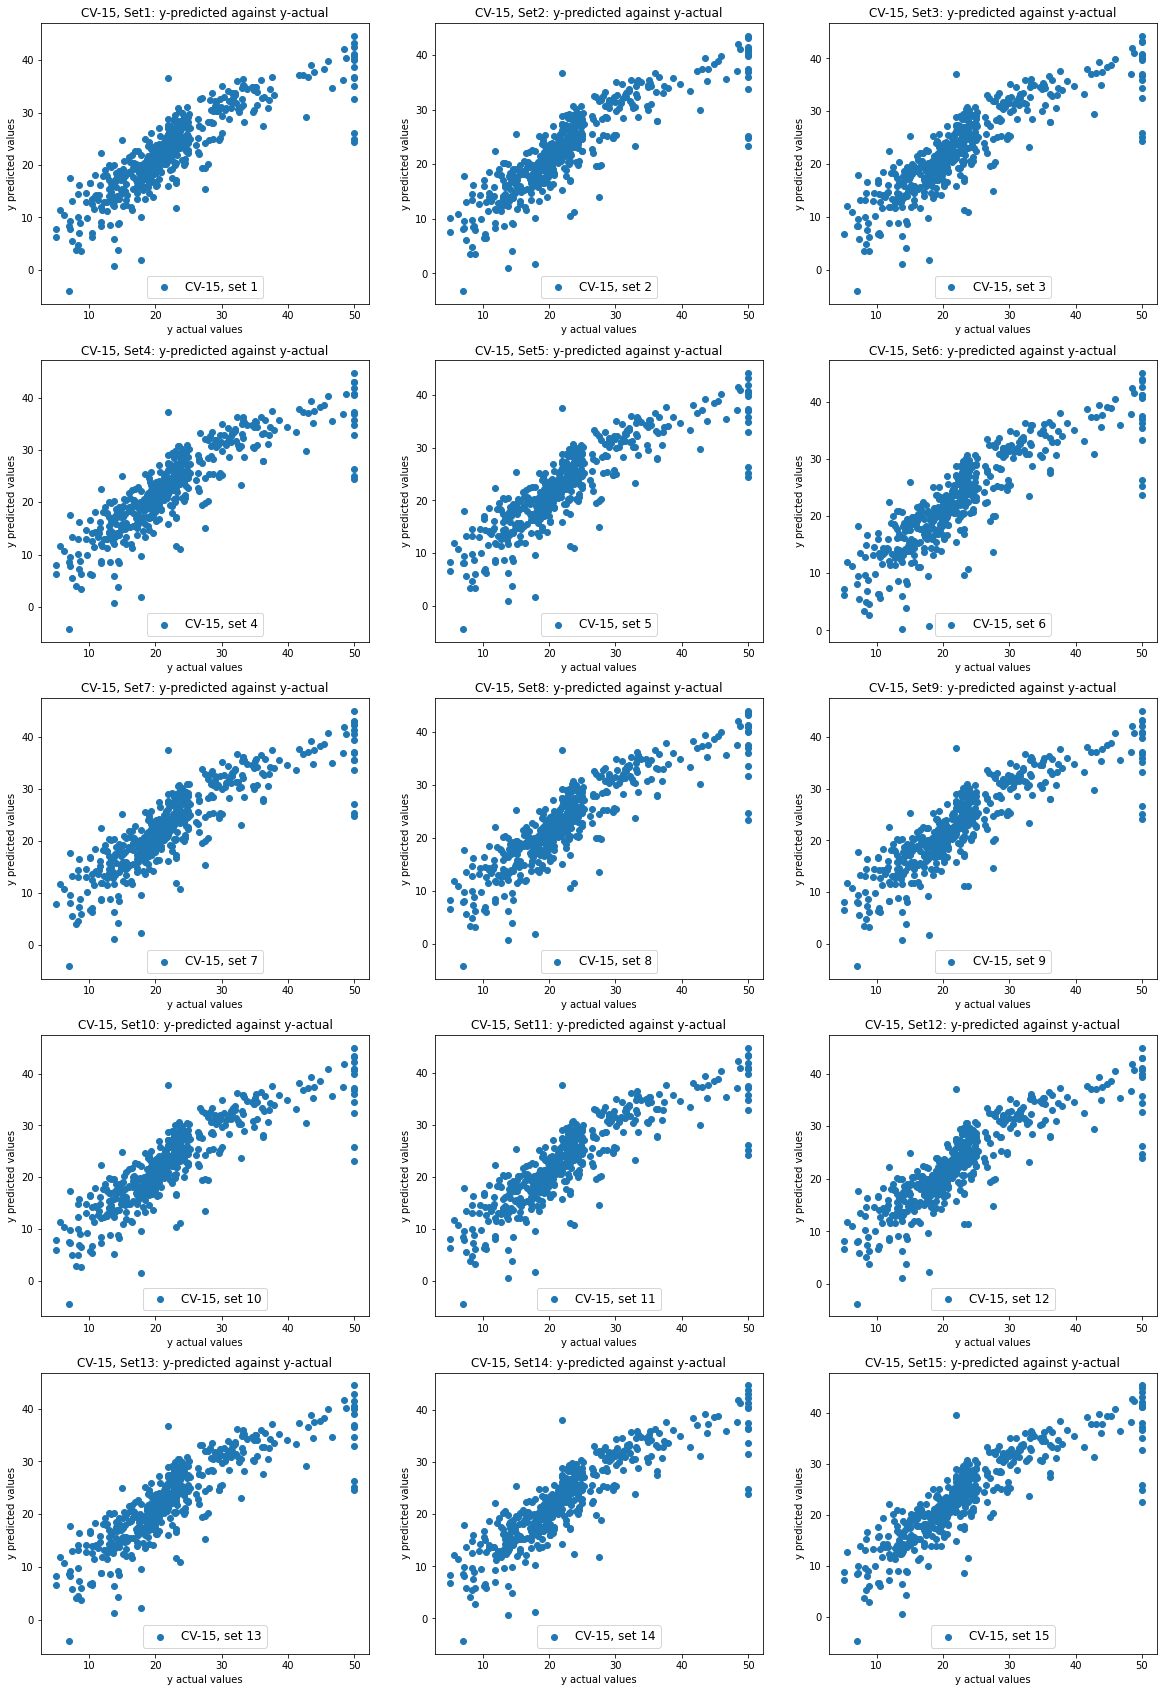

In [20]:
#  CV-15 Plots of y-predicted against y-actual
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,30))

for i in range(15):
    plt.subplot(a, b, c)
    plt.title(f'CV-15, Set{i+1}: y-predicted against y-actual')
    plt.xlabel('number of counts')
    plt.ylabel('y predicted values')
#     m, b = np.polyfit(cv5_yactual[i], cv5_ypred[i], 1)
#     plt.plot(cv5_yactual[i], cv5_ypred[i], '.')
#     plt.plot(cv5_yactual[i], m*cv5_ypred[i]+b)
    plt.scatter(cv15_yactual[i], cv15_ypred[i], label = f'CV-15, set {i+1}')
    plt.xlabel(f'y actual values')
    plt.ylabel(f'y predicted values')
    plt.legend(loc='lower center', fontsize = 'large') 
    c = c + 1

In [21]:
# generate the RMSE tables for CV 5, 10 and 15
i, j = 0, 0
for rmse in [cv5_rmse, cv10_rmse, cv15_rmse]: 
    df = pd.DataFrame(rmse, columns=[f'---CV-{j+5}--RMSE---'])
    print(df)
    print(f'Average RMSE for CV-{j+5} is {np.mean(rmse)}\n')
    i+=1
    j+=5

   ---CV-5--RMSE---
0          4.783127
1          4.633134
2          4.527596
3          4.684155
4          4.681335
Average RMSE for CV-5 is 4.6618695293444254

   ---CV-10--RMSE---
0           4.757387
1           4.727875
2           4.625922
3           4.728597
4           4.364746
5           4.630697
6           4.613196
7           4.747470
8           4.707789
9           4.769722
Average RMSE for CV-10 is 4.6673399511425595

    ---CV-15--RMSE---
0            4.600113
1            4.667484
2            4.729184
3            4.730019
4            4.751340
5            4.675438
6            4.717406
7            4.625338
8            4.773822
9            4.537504
10           4.779103
11           4.662251
12           4.677680
13           4.523216
14           4.607544
Average RMSE for CV-15 is 4.670496243312681



In [31]:
# OUTPUT of cv15_train.csv data in pd dataframe
df_cv15_train = pd.read_csv('cv15_train.csv', header=None)
df_cv15_train
df_cv15_train.shape

(462, 15)

In [32]:
# OUTPUT of cv15_test.csv data in pd dataframe
df_cv15_test = pd.read_csv('cv15_test.csv', header=None)
df_cv15_test
df_cv15_test.shape

(44, 15)

In [25]:
coef = pd.read_csv('optimal_weights.csv', header=None)
coef

,0
0,-9.609758
1,4.642046
2,0.560839
3,2.686734
4,-8.634573
5,19.883687
6,0.067215
7,-16.226661
8,7.039138
9,-6.463327
